# Exercises in linear regression

## Exercise 1

Load in the "EnergyEfficiency.csv" data (on Moodle). It is data about energy efficiency of buildings, more specifically it is about predicting the heating load and cooling load of building based on a set of features about the buildings. It is retrieved from UCI Machine Learning Repository: [Energy efficiency](https://archive.ics.uci.edu/dataset/242/energy+efficiency).

Answer the following questions:
1. Do a visualization of the relationship/correlation between the variables `SurfaceArea` and `HeatingLoad`.
2. Is there a correlation between `SurfaceArea` and `HeatingLoad`? If so, what is the strength of it and is it statistically significant?
3. Does the correlation make sense to you? What if you add `hue = "OverallHeight"` to your scatterplot?
4. Train a simple linear regression model with `SurfaceArea` as independent variable (x) and `HeatingLoad` as dependent variable (y).
5. What does the model say about the change `HeatingLoad` when the `SurfaceArea` goes up by 1 unit?
6. Add the linear regression line to a scatterplot of `SurfaceArea` and `HeatingLoad`.
7. Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.

## Exercise 2

In this exercise, we will continue from Exercise 1 and keep using the "EnergyEfficiency.csv" data (on Moodle).

Answer the following questions:
1. Train a multiple linear regression model for `HeatingLoad` using at least two other variables from the dataset as feature variables.
2. Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?
3. Check each of the assumptions/problems for linear regression.

<h3>Exploring the dataset</h>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


df = pd.read_csv('EnergyEfficiency.csv')
display(df.head())
display(df.sample(frac=0.2))
display(df.tail())
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"Columns: {df.columns.tolist()}")


<hr>
<h1>Exercise 1</h1>

<h1>Task 1 Do a visualization of the relationship/correlation between the variables <code>SurfaceArea</code> and <code>HeatingLoad</code>.</h1>

<h3>Visualization</h3>

<p> Scatter plot </p>

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='SurfaceArea', 
    y='HeatingLoad')
plt.title('Scatter plot of SurfaceArea vs HeatingLoad')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.show()


Just looking at the scatterplot, I find it interresting that it seems that as the surface area increase, the heating load decrease. This suggest <b>negativ correlation</b>

<hr>
<h1>Task 2 Is there a correlation between <code>SurfaceArea</code> and <code>HeatingLoad</code>? If so, what is the strength of it and is it statistically significant?.</h1>

<p>Calculating Pearson correlation coeficient often represented by r. Goes from -1 to 1</p>
<li>+1 = positive linear</li>
<li>0 = no linear relationship</li>
<li>-1 = negative linear</li>
<p>Strengh is calculated based on how close the correlation is to 0</p>
<li>0.1-0.3 = weak</li>
<li>0.3-0.6 = moderate</li>
<li>0.6-1 = strong</li>


In [ ]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['SurfaceArea'], df['HeatingLoad'])

print(f"(r)Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

<h3> Results: </h3>
<p>The results show with r(-0.658) that there is a <b>negative correlation</b>.
<br>The value is also in the 0.6-1 range which proves the correlation is <b>Strong</b>

<p> <b>p-value</b>(1.6869072902149069e-96) is extremely low, (almost zero). Since we move the dicimal 96 places to the left. (95 zeros before the first digit start)
<br> This means that the result is <b>statistically significant</b>
<hr>

<h1>Task 3 Does the correlation make sense to you? What if you add <code>hue = "OverallHeight"</code> to your scatterplot?</h1>

<p>As mentioned earlier, it seems counter intuitive that more surface area should correlate with decrease in heating load</p>

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='SurfaceArea', 
    y='HeatingLoad',
    hue='OverallHeight',)
plt.title('Scatter plot of SurfaceArea vs HeatingLoad, with OverallHeight as color')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.show()


<p>Looking at the scatter plot of <code>SurfaceArea</code> vs <code>HeatingLoad</code> colored by <code>OverallHeight</code>,
<br>the corralation makes way more sense, since it can be seen that all the houses with increased <b>SurfaceArea</b> above 670 ca.
<br> also have a way lower <b>overallHeigh</b>(0-3.5) while the houses with smaller <b>SurfaceArea</b> have increassed <b>overallHeight</b>(7.0).
<br> One theory to why this is happening could be that buildings with smaller surface area but greater height could still have more total volume inside</p>
<p>It reveals a grouping pattern<p>
<hr>

<h1>Task 4 Train a simple linear regression model with <code>SurfaceArea</code> as independent variable (x) and <code>HeatingLoad</code> as dependent variable (y).</h1>


The linear regression is a line that minizes the distance between the points and the line itself.

In [ ]:
from sklearn.linear_model import LinearRegression

x = df[['SurfaceArea']]
y = df['HeatingLoad']
model = LinearRegression()
model.fit(x, y)

print(f"The slope",model.coef_)
print(f"The Intercept",model.intercept_)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='SurfaceArea', 
    y='HeatingLoad',
    hue='OverallHeight',
    palette = 'muted'
)
plt.plot(df['SurfaceArea'], model.predict(x), color='red', label='Regression line')
plt.title('Linear Regression of Heating Load on Surface Area')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.legend()
plt.show()

<h4>The results show that:</h4>
<p>The slope shows that hypothetical for each 1 unit of <code>SurfaceArea</code> the <code>HeatingLoad</code> decrease by 0.075</p>
<p>The intercept shows that hypothetical the <code>SurfaceArea</code> is 0 when <code>HeatLoad</code> is 72.95</p>
<hr>

<h1>Task 5 What does the model say about the change <code>HeatingLoad</code> when the <code>SurfaceArea</code> goes up by 1 unit?</h1>


<h3>This was answered in previous result:</h3>
<p>From reading the slope, if <code>SurfaceArea</code> goes up by 1 unit <code>HeatingLoad</code> decrease by 0.075</p></h2>
<hr>

<h1>Task 6 Add the linear regression line to a scatterplot of <code>SurfaceArea</code> and <code>HeatingLoad</code>.


<p>Already done in task 4, but lets just repeat</p>

In [ ]:
from sklearn.linear_model import LinearRegression

x = df[['SurfaceArea']]
y = df['HeatingLoad']
model = LinearRegression()
model.fit(x, y)

print(f"The slope",model.coef_)
print(f"The Intercept",model.intercept_)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='SurfaceArea', 
    y='HeatingLoad',
    hue='OverallHeight',
    palette = 'coolwarm'
)
plt.plot(df['SurfaceArea'], model.predict(x), color='green', label='Regression line')
plt.title('Linear Regression of Heating Load on Surface Area')
plt.xlabel('Surface Area')
plt.ylabel('Heating Load')
plt.legend()
plt.show()

<hr>
<h1>Task 7 Evaluate how good your simple linear regression model is. Hint: Chose one or several measures to evaluate your model.</h1>

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(x)

r2 = r2_score(y, y_pred)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

x_const = sm.add_constant(x)
model = sm.OLS(y, x_const).fit()

print(model.summary())

<h3> Evaluation :</h3> 
    <ul>
<li><strong>(R<sup>2</sup>)R-Square</strong>(0.433) = 43.3% of heating load can be explained by just surface area alone. Meaning over half of variation remains unexplained, and caused by other factors, like height</li>
<br>
<li><strong>RMSE</strong>(7.592) = The model's predictions is on average about 7.6 units off the true heating load data. Meaning that the regression line is on average 7.6 units off the datapoints. Also called error margin</li>
<br>
<li><strong>F-statistic</strong>(585.3) = Since this number is way about 100, it's strong evidence that the model explains lots of variance. F-statistic test whether the regression model explains more significance than a flat model with no predictors, as a flat horizontal line. Meaning it check whether the models is better than just predicting the mean</li>
<p><i>0-1: useless / 5-10: Weak to moderate evidence / 20-100+ Strong evidence / >100 Very strong evidence</i></p>
<li><strong>p-value</strong> for <strong>F-statistic</strong>(1.69e-96) = the p-value is practically zero, meaning that the result of F-statistic is statistically significant</li>
    </ul> 
    <ul>
<br>
<strong>Residual diagnostic</strong>
<p>Residuals are errors. Meaning the difference between the actual values and the predicted. So it's prediction errors.
<br>We want the residuals to be random and not patterned. Otherwise there's obviously something wrong with the model.
<br> So normally distribution is good, since it means the residual are spread evenly.</p>
    
<li><strong>Omnibus</strong>(37.973)=<strong>p-value</strong> is 0.000, which means the residuals are not normally distrubuted. This indicates the model is bad. There must be asymmetry and/or there is peakiness(some residuals spike)</li>
<p><i>Omnibus tests for skewness(asymmetry) and kurtosis(peakedness), the most important is the p-value, since high indicate residuals are normal, while low indicates they are not. The Omnibus value is used to calculate the p-value. A high omnibus value leads to a low p-value, indicating non-normality.</i></p>
<li><strong>Jarque-Bera</strong>(42.851)=<strong>p-value</strong> is 4.95e-10 which is extremely low. Indicating the residuals are not normally distributed. 
<p><i>JB also tests for Skewness and Kurtosis. The value itself is mostly used to calculate the p-value, but the higher it is, the worse residuals match normal distribution.</i></p>
</li>

<li><strong>Durbin-Watson</strong>(0.321)= Since the number is very low, it means the residuals are highly autocorrelated and indeed follows a pattern. Meaning the model is problematic.
<p><i>Durbin-Watson checks for autocorrelation in residuals. Meaning if the errors follow a pattern over time/order. Meaning if one residual is high, is the next one might also be high. This would be an indication something is wrong. Ranges are from 0 to 4. The higher the value, the less autocorrelation. Ranges interpreted as 0-1: high autocorrelation / <1.5: positive autocorrelation / 1.5-2.5 acceptable range / 2.5+ Negative autocorrelation (less common) </i></p>
</li>
    
</ul>

<h3>Conclusion :</h3>
<p>Even though R-Square, RMSE and F-statistic, affirm the model. The Residual diagnostics tests, Omnibus and Jarque-Bera shows there are clearly skewness and/or peakiness in the errors that fall outside the line. Durbin-Watson shows that there are autocorrelation in the residuals. So in my evauluation I will conclude, that even though the linear regression model have statistical significance, the errors show too much systematic behavior to be evaluated as good. The errors should have been more normally distributed. Therefore the model raises concerns.</p>



<hr>
<h1>Exercise 2</h1>

<h1>Task 1 Train a multiple linear regression model for <code>HeatingLoad</code> using at least two other variables from the dataset as feature variables.</h1>

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

variablesArray = ["SurfaceArea","RoofArea", "WallArea", "OverallHeight"]

x = df[variablesArray]
y = df['HeatingLoad']

# To avoid overfitting I split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


MultiModel = LinearRegression()
MultiModel.fit(x_train, y_train)

y_pred = MultiModel.predict(x_test)


print(f"The slope",MultiModel.coef_)
print(f"The Intercept",MultiModel.intercept_)

<h1>Task 2 Evaluate our multiple linear regression model and compare its performance to your simple linear regression model. Did you manage to make a better model?</h1>

<p>Since it's not possible to visualize a 4D regression with one line on one plot. It's because multiple regression uses multipule different columns as inputs. So that can't be visualized directly to a single 2D scatterplot. instead lets plot <strong>predicted vs actual</strong>.</p> 

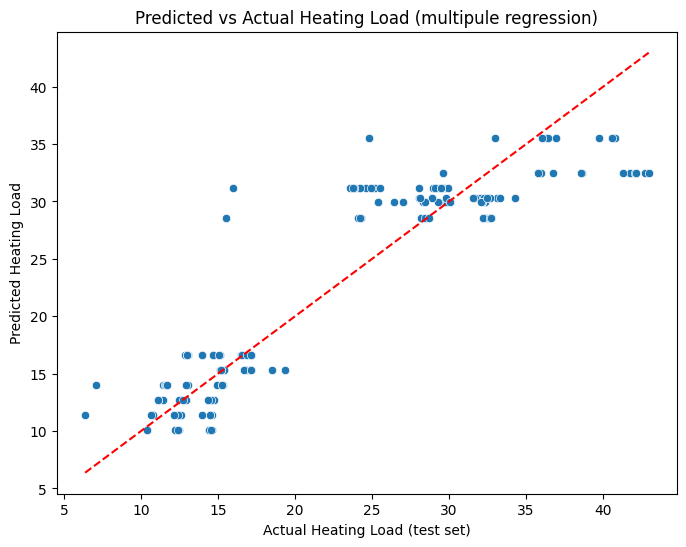

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Heating Load (test set)')
plt.ylabel('Predicted Heating Load')
plt.title('Predicted vs Actual Heating Load (multipule regression)')
plt.show()

<p>Each dot is a building or row in the dataset. The x-axis is the actual values of HeatingLoad from the test set, while y-axis shows the models predicted values from those same inputs. The red line is the where prediction==truth.</p>

<p>If a dot lands on the red line, it measn the model predicted the exact correct value, whil dot above the line, means overestimated HeatingLoad, and dot below the line is  a underestimate</p>

<p><strong>Evaluation of plot</strong>: the points follow the diagonal line fairly close, expecially between 10 and 35. There is some spread, but most points cluster closely around the line. This indicates the model is reasonably accurate at predicting.</p>

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


r2_multi = r2_score(y_test, y_pred)
mae_multi = mean_squared_error(y_test, y_pred)
mse_multi = 


# r2 = r2_score(y, y_pred)

# mse = mean_squared_error(y, y_pred)
# rmse = np.sqrt(mse)

# print(f"R-squared: {r2:.3f}")
# print(f"RMSE: {rmse:.3f}")

# x_const = sm.add_constant(x)
# MultiModel = sm.OLS(y, x_const).fit()

# print(MultiModel.summary())

ValueError: Found input variables with inconsistent numbers of samples: [768, 154]

<h1>Task 3 Check each of the assumptions/problems for linear regression.</h1>